<a href="https://colab.research.google.com/github/yadavrahyl2k15/credit_card_customer_segmentation/blob/master/Dealing_with_Missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
###what are type of missing data?
###1.Missing completely at Random(MCAR)

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("/content/titanic_train.csv")

In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

AGE AND CABIN IS NOT MISSING COMPLETELY AT RANDOM AS DATA IS COLLECTED AFTER ACCIDENT AND PEOPLE DIED AND WE CANT GET AGE AND CABIN.
WHEREAS IN CASE OF Embarked it is MCAR.

In [11]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
####2.MISSING DATA NOT AT RANDOM(MNAR)-HAVING REALTIONSHIP BETWEEN MISSING VALUES AND OTHER DATA SET

In [13]:
import numpy as np

In [15]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [20]:
df.groupby(['Survived'])['cabin_null'].mean()
#it is number of people dont survived has more missing value which is true i.e.87%

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [21]:
####3.MISSING AT RANDOM(MAR)

In [22]:
#ALL THE TECHNIQUES OF HANDLING MISSING VALUES

1.Mean/median/mode replacement
2.Random sample imputation
3.Caputring NAN  values with new features
4.End of Distribution Imputation
5.Arbitary imputation
6.frequent categories imputation

In [23]:
#MEAN/MODE/MEDIAN IMPUTATION
#IT HAS ASSUMPTION THAT THE DATA ARE MISSING COMPLETELEY AT RANDOM(MCAR).WE SOLVE BY REPLACING NAN VALUE WITH MOST FREQUENT OCCURANCE OF VARIABLE. 

In [78]:
data=pd.read_csv("/content/titanic_train.csv",usecols=['Age','Fare','Survived'])

In [79]:
data.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [29]:
median=data.Age.median() #we choose median as mean not as there are some outliers
median

28.0

In [30]:
def impute_age(data,variable,median):
  data[variable+"_median"]=data[variable].fillna(median)

In [31]:
impute_age(data,'Age',median)
data.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [36]:
print(data['Age'].std())
print(data['Age_median'].std())

14.526497332334044
13.019696550973194


In [39]:
####ADVANTAGES 
#1.EASY TO IMPLEMENT
#2.FASTER WAY TO OBTAIN COMPLETE DATASET
####DISADVANTAGES
#1.CHANGE OR DISTORTION OF VALUES
#2.IMPACTS CORELATION

**RANDOM SAMPLE IMPUTATION**

In [41]:
####AIM- RANDOM SAMPLE IMPUTATION CONSISTS OF RANDOM SAMPLE OBSERVATION FROM THE DATASET AND WE USE THIS OBSERVATION TO REPLACE NANA VALUES
####IT IS ASSUME TO BE USED AT DATA IS MISSING AT RANDOM (MCAR)

In [70]:
data=pd.read_csv("/content/titanic_train.csv",usecols=['Fare','Survived','Age'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [71]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [72]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [73]:
data['Age'].dropna().sample(data['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [74]:
data[data['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [75]:
def imput_naa(data,variable,median):
  data[variable+'_median']=data[variable].fillna(median)
  data[variable+'_random']=data[variable]
  random_sample=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
  random_sample.index=data[data[variable].isnull()].index
  data.loc[data[variable].isnull(),variable+"_random"]=random_sample

In [80]:
imput_naa(data,"Age",median)
data.head(5)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


**capturing nan with new features**

it work well with when data is not missing completely random

In [84]:
rt=pd.read_csv(('/content/titanic_train.csv'),usecols=['Fare','Age','Survived'])

In [85]:
rt.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [86]:
rt['Age_Nan']=np.where(df['Age'].isnull(),1,0)
rt.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [90]:
median=df.Age.median()
median

28.0

In [98]:
rt['Age'].fillna(median,inplace=True)

In [100]:
rt.head(40)

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


**ADVANTAGES**

1.   EASY TO IMPLEMENT
2.   CAPUTRES THE IMPORTANCE OF MISSING VALUE

**DISADVANTAGE**

1.   CREATING ADDITINAOL FEATURES i.e curse of dimensonality   





**END OF DISTRIBUTION IMPUTATION**

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [101]:
dig=pd.read_csv("/content/titanic_train.csv",usecols=['Fare','Age','Survived'])
dig.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


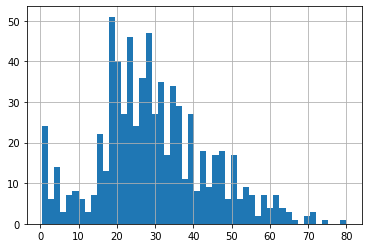

In [102]:
dig.Age.hist(bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


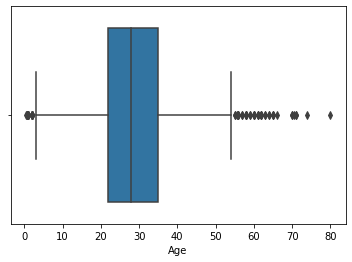

In [116]:
import seaborn as sns
sns.boxplot('Age',data=dig)

now taking end of distribution i.e. after mean+3standard deviation in normal distribution curve

In [104]:
extreme=dig.Age.mean()+3*dig.Age.std()

In [108]:
median=dig.Age.median()

In [109]:
def imput_nan(dig,variable,median,extreme):
  dig[variable+"_end_distribution"]=dig[variable].fillna(extreme)
  dig[variable].fillna(median,inplace=True)

In [111]:
imput_nan(dig,'Age',median,extreme)

In [112]:
dig.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


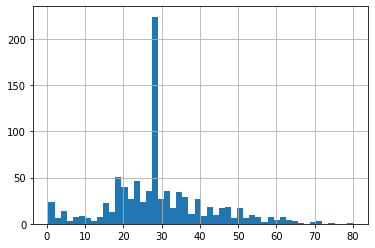

In [114]:
dig['Age'].hist(bins=50)

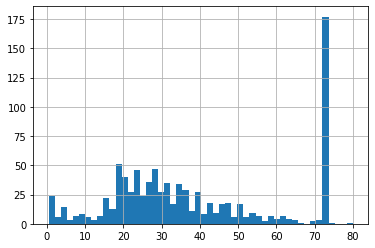

In [115]:
dig['Age_end_distribution'].hist(bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


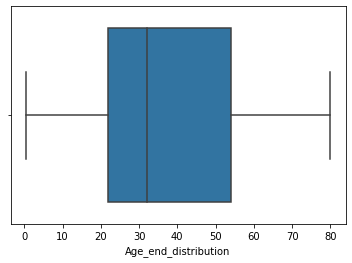

In [117]:
sns.boxplot('Age_end_distribution',data=dig)

**ADVANTAGES**

1.   EASY TO IMPLEMENT
2.   CAPTURES THE IMPORTANCE OF MISSINGNESS IF THERE IS ONE

**DISADVANTAGES**

1.   DISTORTS THE ORIGINAL DISTRIBUTION OF SAMPLE
2.   IF THE NUMBER OF NA IS BIG.IT WILL MASK TRUE OUTLIERS IN DISTRIBUTION. 





**ARBITARORY VALUE IMPUTATION**



IT CONSIST OF REPLACING  NaN BY ARBITARY VALUE

In [118]:
import pandas as pd
import numpy as np


In [119]:
rig=pd.read_csv("/content/titanic_train.csv",usecols=['Fare','Survived','Age'])

In [120]:
rig.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


Arbitrary value-it should be not frequently present i.e end of histograms 

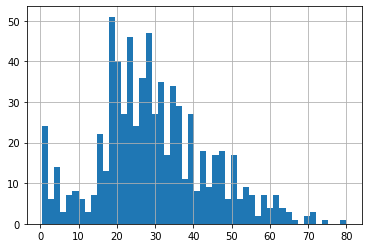

In [122]:
rig['Age'].hist(bins=50)

In [124]:
def imput_naan(data,variable):
  data[variable+"_hundreds"]=data[variable].fillna(100)

In [125]:
imput_naan(rig,'Age')

In [127]:
rig.head()

,Survived,Age,Fare,Age_hundreds
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
